In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

model = Sequential([
    Input(shape=(11,)),
    Dense(100, activation='sigmoid'),
    Dropout(0.2),
    Dense(200, activation='relu'),
    Dropout(0.4),
    Dense(50, activation='tanh'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,960 (124.84 KB)

 Trainable params: 31,960 (124.84 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import pandas as pd

redwine = pd.read_csv('winequality-red.csv', sep=';')
X, y = redwine.iloc[:, :-1], redwine.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size=200, epochs=300)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3061 - loss: 1.8925  
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4470 - loss: 1.3367 
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4329 - loss: 1.2572 
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4604 - loss: 1.2375 
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4612 - loss: 1.1947 
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4821 - loss: 1.1773 
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4545 - loss: 1.2008 
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4671 - loss: 1.1768 
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4771 - loss: 1.1547 
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4762 - loss: 1.1649 
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4962 - loss: 1.1586 
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4696 - lo

In [14]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5450 - loss: 1.0089 


[1.0088645219802856, 0.5450000166893005]

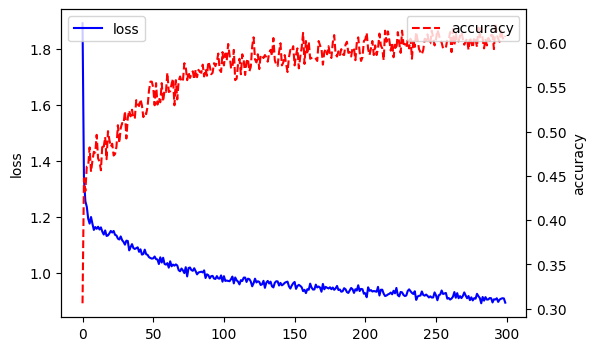

In [18]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(history.history['loss'], '-b', label='loss')
ax1.set_ylabel('loss')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], 'r--', label='accuracy')
ax2.set_ylabel('accuracy')
ax2.legend(loc='upper right')
plt.show()